In [1]:
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# Reflecting into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [4]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
session = Session(engine)

In [6]:
# reflect the database
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
# tables
Station = Base.classes.station
Measurement = Base.classes.measurement

# Precipitation Analysis

In [9]:
most_recent_date = session.query(func.MAX(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [10]:
most_recent_datetime = datetime.strptime(most_recent_date, "%Y-%m-%d")
one_year_ago = (most_recent_datetime - timedelta(days=365)).date()
one_year_ago

datetime.date(2016, 8, 23)

In [11]:
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
precipitation_data[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [12]:
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])
precipitation_df = precipitation_df.sort_values("date")
precipitation_df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


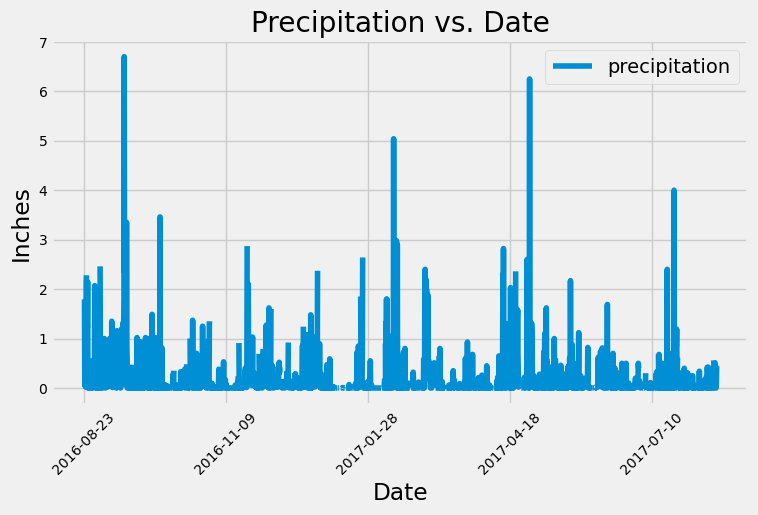

In [13]:
# figure
figure = precipitation_df.plot(x="date", y="precipitation", figsize=(8, 4.5))

# formatting
figure.set_title("Precipitation vs. Date")
figure.set_xlabel("Date")
figure.set_ylabel("Inches")

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# show
plt.show()

# Station Analysis

In [14]:
total_num_stations = session.query(Station.station).count()
total_num_stations

9

In [15]:
most_active_stations = session.query(
    Measurement.station, func.count(Measurement.station)
).group_by(
    Measurement.station
).order_by(
    -func.count(Measurement.station)
).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
most_active_stations_temperatures = session.query(
    func.MIN(Measurement.tobs), func.MAX(Measurement.tobs), func.AVG(Measurement.tobs)
).filter(
    Measurement.station == "USC00519281"
).all()

most_active_stations_temperatures

[(54.0, 85.0, 71.66378066378067)]

In [17]:
temperature_data = session.query(
    Measurement.tobs
).filter(
    Measurement.station == "USC00519281", Measurement.date <= "2017-08-18", Measurement.date >= "2016-08-18"
).all()

temperature_data[:5]

[(80.0,), (79.0,), (81.0,), (79.0,), (78.0,)]

In [18]:
temperature_df = pd.DataFrame(temperature_data)
temperature_df.head()

,tobs
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0


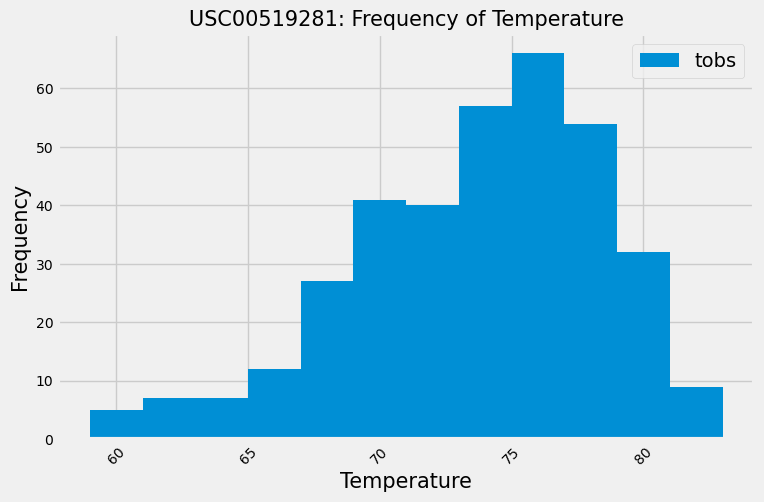

In [19]:
# figure
figure = temperature_df.plot.hist(bins=12, figsize=(8, 5))

# formatting
figure.set_title("USC00519281: Frequency of Temperature", fontsize=15)
figure.set_xlabel("Temperature", fontsize=15)
figure.set_ylabel("Frequency", fontsize=15)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# show
plt.show()

In [20]:
session.close()